## Пошаговая реализация кластеризации методом K-means

In [294]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot
from scipy.spatial.distance import cdist

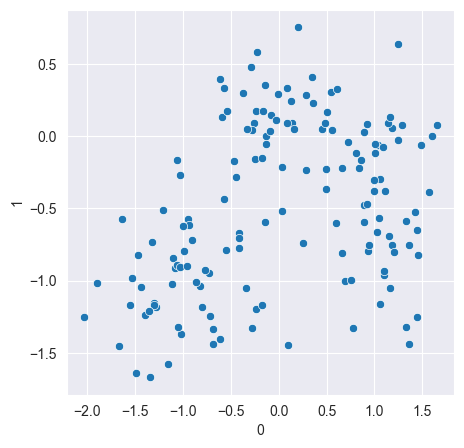

In [300]:
# создадим 3 кластера наблюдений
X = np.zeros((150, 2))

# задаем случайную генерацию
np.random.seed()
# 1 кластер
X[:50, 0] = np.random.normal(loc=0.0, scale=.5, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

# 2 кластер
X[50:100, 0] = np.random.normal(loc=1, scale=.3, size=50)
X[50:100, 1] = np.random.normal(loc=-0.5, scale=.5, size=50)

# 3 кластер
X[100:150, 0] = np.random.normal(loc=-1.0, scale=.4, size=50)
X[100:150, 1] = np.random.normal(loc=-1.0, scale=.3, size=50)

X_df = pd.DataFrame(X)
X_df[2] = 'dots'
plt.figure(figsize=(5, 5))
sns.scatterplot(X_df, x=0, y=1)
plt.show()

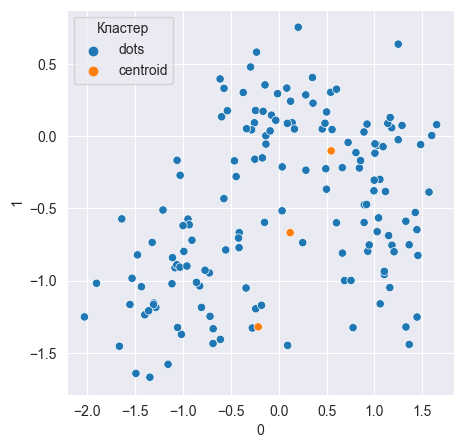

In [301]:
# добавим 3 случайных точки-центроида
np.random.seed()
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

X_df = pd.concat([X_df, pd.DataFrame(centroids)]).reset_index(drop=True)
X_df.iloc[150:, 2] = 'centroid'
plt.figure(figsize=(5, 5))
sns.scatterplot(X_df, x=0, y=1, hue=2)
plt.legend(title='Кластер')
plt.show()

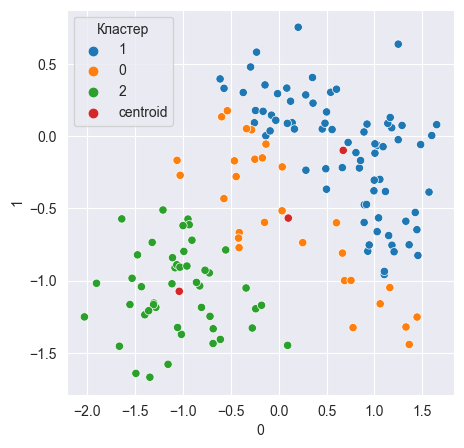

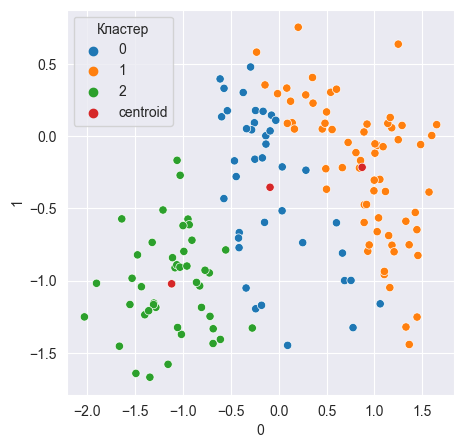

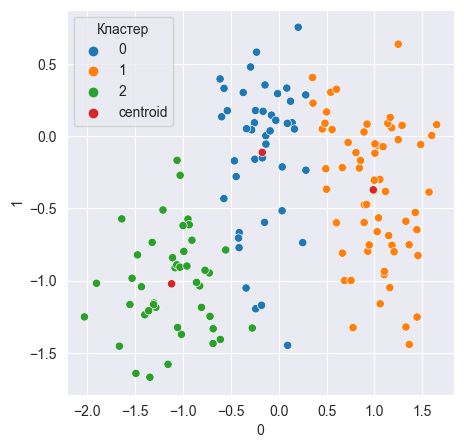

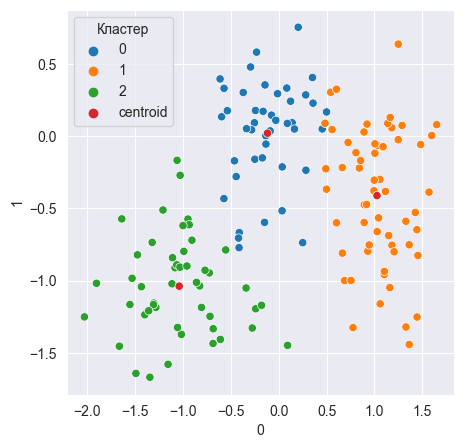

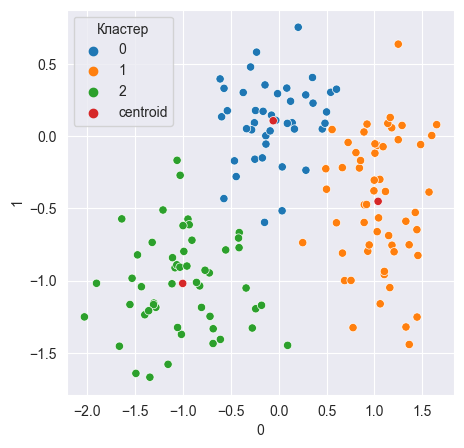

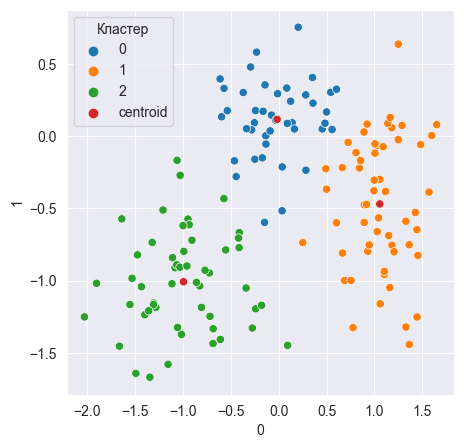

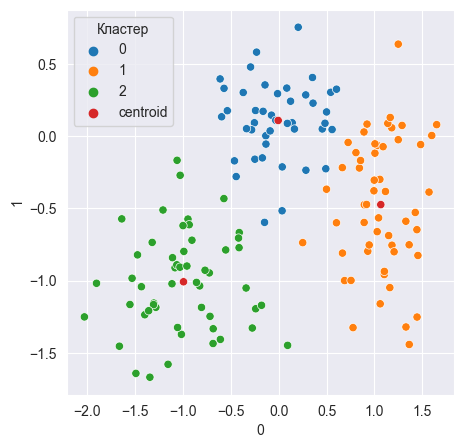

In [302]:
# разделим наблюдения на кластеры
while True:
    # считаем расстояния от наблюдений до центроидов
    distances = cdist(X_df.iloc[:150, 0:2], X_df.iloc[150:, 0:2])
    # ищем ближайшие центроиды к каждому наблюдению, проставляем соответсвующий лейбл кластера
    labels = distances.argmin(axis=1)
    # если наблюдения не изменили принадлежность к кластеру c прошлого цикла, то останавливаем цикл
    # считаем задачу кластеризации выполненной
    if list(labels) == list(X_df[2][:150]):
        break
    else:
        # иначе обновляем принадлежность наблюдений к кластеру
        X_df[2][:150] = labels
        # переместим центроиды в геометрический центр кластера
        X_df.iloc[150:151, 0:2] = X_df[[0, 1]][X_df[2] == 0].mean()
        X_df.iloc[151:152, 0:2] = X_df[[0, 1]][X_df[2] == 1].mean()
        X_df.iloc[152:, 0:2] = X_df[[0, 1]][X_df[2] == 2].mean()
        plt.figure(figsize=(5, 5))
        scatterplot(X_df, x=0, y=1, hue=2)
        plt.legend(title='Кластер')
plt.show()